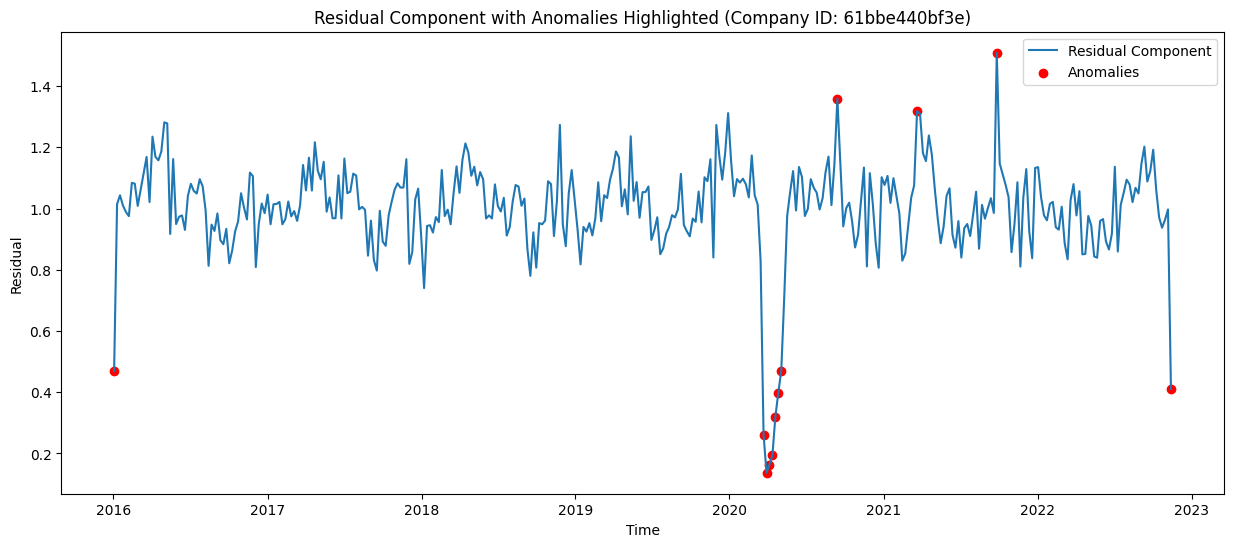

In [ ]:
# Required Libraries in Alphabetical Order
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose

class AnomalyDetector:
    def __init__(self, data_path):
        """
        Initialize the AnomalyDetector class with the path to the data.
        Load and preprocess the data.
        """
        # Load the data and convert the 'trans_date' column to datetime format
        self.data = pd.read_csv(data_path)
        self.data['trans_date'] = pd.to_datetime(self.data['trans_date'])

    def analyze_company_weekly_multiplicative(self, company_id, threshold=2):
        """
        Analyze and detect anomalies for a given company with weekly resampling (multiplicative model).
        """
        # Filtering data for the specific company and setting 'trans_date' as index
        company_data = self.data[self.data['Unnamed: 0'] == company_id].set_index('trans_date')

        # Resampling the data to weekly intervals
        weekly_data = company_data['data'].resample('W').sum()

        # Performing seasonal decomposition with a seasonal period of 52 weeks (1 year) and multiplicative model
        decomposition = seasonal_decompose(weekly_data, period=52, model='multiplicative', extrapolate_trend='freq')

        # Removing NaN values from the residual component
        residuals = decomposition.resid.dropna()

        # Calculating the Z-score of the residual component
        z_scores = zscore(residuals)

        # Identifying anomalies based on the threshold
        anomalies_index = np.where((z_scores > threshold) | (z_scores < -threshold))[0]

        # Extracting the dates and values of the anomalies
        anomalies_dates = residuals.index[anomalies_index]
        anomalies_values = residuals.iloc[anomalies_index]

        # Plotting the residual component with anomalies highlighted
        plt.figure(figsize=(15, 6))
        plt.plot(residuals, label='Residual Component')
        plt.scatter(anomalies_dates, anomalies_values, color='red', label='Anomalies')
        plt.title(f'Residual Component with Anomalies Highlighted (Company ID: {company_id})')
        plt.xlabel('Time')
        plt.ylabel('Residual')
        plt.legend()
        plt.show()

# Note: To load the data, either specify the local path or include the path where it's stored.

data_path = "data4columbia_credit.csv"
ad = AnomalyDetector(data_path)
company_id_to_analyze = "61bbe440bf3e"
ad.analyze_company_weekly_multiplicative(company_id_to_analyze)